In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
import re
import time
import sys
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import gensim.downloader as api
import gensim
from gensim.models import KeyedVectors
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import enchant
import joblib
import os
from imblearn.over_sampling import RandomOverSampler

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score

from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
datasets = {
    "davidson" : pd.read_csv("datasets\model_training\davidson_p.csv"),
    "hateval" : pd.read_csv("datasets\model_training\hateval_p.csv"),
    "ethos" : pd.read_csv("datasets\model_training\ethos_p.csv"),
    "jigsaw": pd.read_csv("datasets\model_training\jigsaw_p.csv"),
    "qian": pd.read_csv("datasets\model_training\qian_p.csv")
}
datasets["davidson"]["text"] = datasets["davidson"]["text"].astype("str")
datasets["hateval"]["text"] = datasets["hateval"]["text"].astype("str")
datasets["ethos"]["text"] = datasets["ethos"]["text"].astype("str")
datasets["jigsaw"]["text"] = datasets["jigsaw"]["text"].astype("str")
datasets["qian"]["text"] = datasets["qian"]["text"].astype("str")


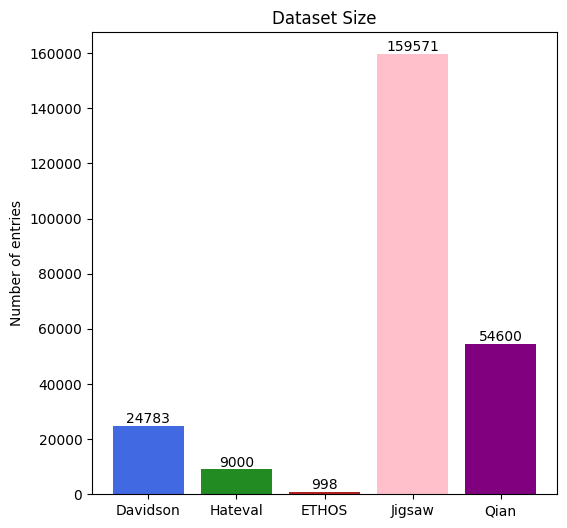

In [63]:
# Sample data
data = [len(datasets["davidson"]), len(datasets["hateval"]), len(datasets["ethos"]), len(datasets["jigsaw"]), len(datasets["qian"])]

# Create the bar plot
plt.figure(figsize=(6, 6))
bars = plt.bar(range(len(data)), data, color=['royalblue', 'forestgreen', 'firebrick', 'pink', 'purple'])

# Add title and labels
plt.title('Dataset Size')
plt.xticks([0, 1, 2, 3, 4], ["Davidson", "Hateval", "ETHOS", "Jigsaw", "Qian"])
plt.ylabel("Number of entries")

# Add floating text at the top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.show()

C:\Users\Portul\AppData\Local\Temp\ipykernel_12416\3636870135.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = [len(datasets["davidson"][datasets["davidson"]["class"] == 0]),len(datasets["hateval"][datasets["davidson"]["class"] == 0]),len(datasets["ethos"][datasets["ethos"]["class"] == 0]), len(datasets["jigsaw"][datasets["jigsaw"]["class"] == 0]), len(datasets["qian"][datasets["qian"]["class"] == 0])]
C:\Users\Portul\AppData\Local\Temp\ipykernel_12416\3636870135.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2 = [len(datasets["davidson"][datasets["davidson"]["class"] == 1]),len(datasets["hateval"][datasets["davidson"]["class"] == 1]),len(datasets["ethos"][datasets["ethos"]["class"] == 1]), len(datasets["jigsaw"][datasets["jigsaw"]["class"] == 1]), len(datasets["qian"][datasets["qian"]["class"] == 1])]


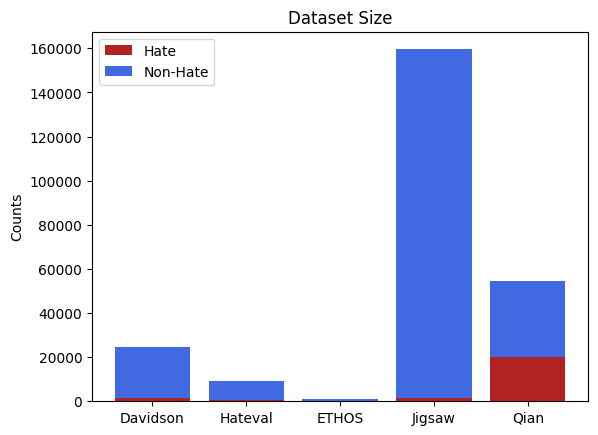

In [64]:
data1 = [len(datasets["davidson"][datasets["davidson"]["class"] == 0]),len(datasets["hateval"][datasets["davidson"]["class"] == 0]),len(datasets["ethos"][datasets["ethos"]["class"] == 0]), len(datasets["jigsaw"][datasets["jigsaw"]["class"] == 0]), len(datasets["qian"][datasets["qian"]["class"] == 0])]
data2 = [len(datasets["davidson"][datasets["davidson"]["class"] == 1]),len(datasets["hateval"][datasets["davidson"]["class"] == 1]),len(datasets["ethos"][datasets["ethos"]["class"] == 1]), len(datasets["jigsaw"][datasets["jigsaw"]["class"] == 1]), len(datasets["qian"][datasets["qian"]["class"] == 1])]


labels = ["Davidson", "Hateval", "ETHOS", "Jigsaw", "Qian"]
x = np.arange(len(labels))

fig, ax = plt.subplots()

# Plotting data2 first (bottom)
ax.bar(x, data2, label='Hate', color=["firebrick"])

# Plotting data1 on top of data2
ax.bar(x, data1, bottom=data2, label='Non-Hate', color=["royalblue"])

ax.set_ylabel('Counts')
ax.set_title('Dataset Size')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

C:\Users\Portul\AppData\Local\Temp\ipykernel_12416\1209159211.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = [len(datasets["davidson"][datasets["davidson"]["class"] == 0]),len(datasets["hateval"][datasets["davidson"]["class"] == 0]),len(datasets["ethos"][datasets["ethos"]["class"] == 0]), len(datasets["qian"][datasets["qian"]["class"] == 0])]
C:\Users\Portul\AppData\Local\Temp\ipykernel_12416\1209159211.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2 = [len(datasets["davidson"][datasets["davidson"]["class"] == 1]),len(datasets["hateval"][datasets["davidson"]["class"] == 1]),len(datasets["ethos"][datasets["ethos"]["class"] == 1]), len(datasets["qian"][datasets["qian"]["class"] == 1])]


[0.05770084 0.07955556 0.16332665 0.36371795]
0.00880485802558109
[ 1430   716   163 19859]
1405


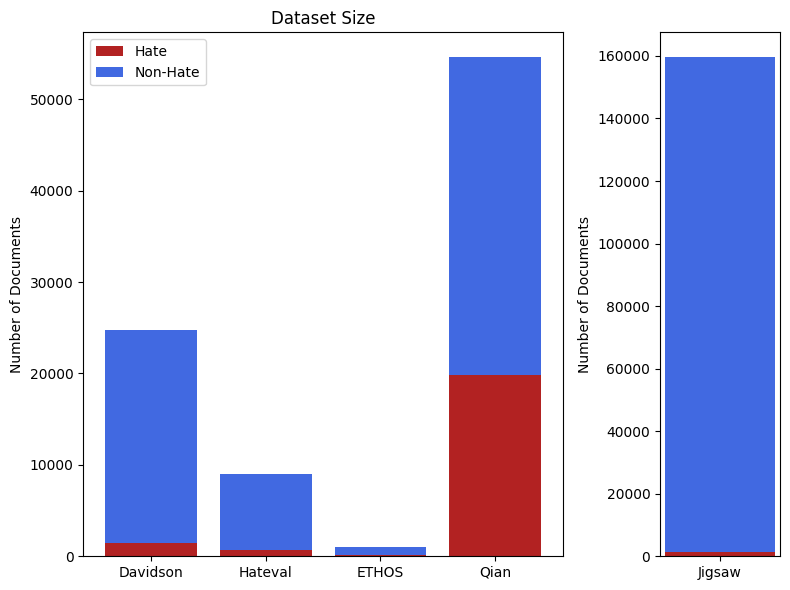

In [69]:
# Sample data
data1 = [len(datasets["davidson"][datasets["davidson"]["class"] == 0]),len(datasets["hateval"][datasets["davidson"]["class"] == 0]),len(datasets["ethos"][datasets["ethos"]["class"] == 0]), len(datasets["qian"][datasets["qian"]["class"] == 0])]
data2 = [len(datasets["davidson"][datasets["davidson"]["class"] == 1]),len(datasets["hateval"][datasets["davidson"]["class"] == 1]),len(datasets["ethos"][datasets["ethos"]["class"] == 1]), len(datasets["qian"][datasets["qian"]["class"] == 1])]
print(np.array(data2) / (np.array(data1) + np.array(data2)))
labels = ["Davidson", "Hateval", "ETHOS", "Qian"]
x = np.arange(len(labels))
width = 0.8
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 1]}, figsize=(8, 6))


# First plot
ax1.bar(x, data2,width=width, label='Hate', color="firebrick")
ax1.bar(x, data1, width=width, bottom=data2, label='Non-Hate', color="royalblue")
ax1.set_ylabel('Number of Documents')
ax1.set_title('Dataset Size')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

# Second plot (details can be modified as needed)
labels = ["Jigsaw"]
x = np.arange(len(labels))
print(len(datasets["jigsaw"][datasets["jigsaw"]["class"] == 1]) / len(datasets["jigsaw"]))
data3 = np.random.rand(5) * 100  # Example data for the second plot
ax2.bar(x, len(datasets["jigsaw"][datasets["jigsaw"]["class"] == 1]), width=width, label='Hate', color="firebrick")
ax2.bar(x, len(datasets["jigsaw"][datasets["jigsaw"]["class"] == 0]), width=width, bottom=len(datasets["jigsaw"][datasets["jigsaw"]["class"] == 1]), label='Non-Hate', color="royalblue")
ax2.set_ylabel('Number of Documents')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)

plt.tight_layout()
print(np.array(data2))
print(len(datasets["jigsaw"][datasets["jigsaw"]["class"] == 1]))
plt.show()

{'Davidson': 62.24097163378122, 'Hateval': 105.48955555555555, 'ETHOS': 108.36573146292585, 'Jigsaw': 374.222841243083, 'Qian': 188.48534798534797}


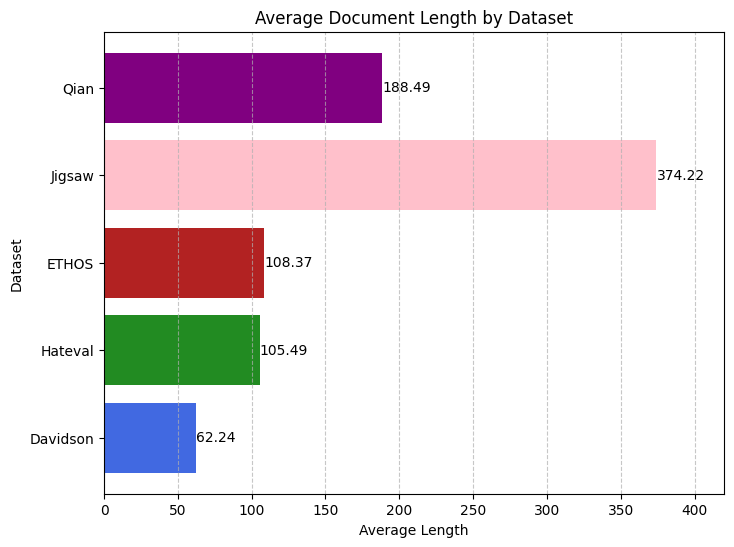

In [66]:
# Sample data
total_length_d = sum(len(doc) for doc in datasets["davidson"]["text"].astype("str")) / len(datasets["davidson"]["text"])
total_length_h = sum(len(doc) for doc in datasets["hateval"]["text"].astype("str")) / len(datasets["hateval"]["text"])
total_length_e = sum(len(doc) for doc in datasets["ethos"]["text"].astype("str")) / len(datasets["ethos"]["text"])
total_length_j = sum(len(doc) for doc in datasets["jigsaw"]["text"].astype("str")) / len(datasets["jigsaw"]["text"])
total_length_q = sum(len(doc) for doc in datasets["qian"]["text"].astype("str")) / len(datasets["qian"]["text"])
average_lengths = {
    "Davidson": total_length_d,
    "Hateval": total_length_h,
    "ETHOS": total_length_e,
    "Jigsaw": total_length_j,
    "Qian": total_length_q
}
print(average_lengths)

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(range(len(average_lengths)), list(average_lengths.values()), color=['royalblue', 'forestgreen', 'firebrick', 'pink', 'purple'])

# Add labels and title
plt.xlabel('Average Length')
plt.ylabel('Dataset')
plt.title('Average Document Length by Dataset')
plt.yticks(range(len(average_lengths)), list(average_lengths.keys()))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(right=420)

# Add floating text at the end of each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

plt.show()

In [74]:
nltk.download('punkt')
nltk.download('stopwords')

# Get NLTK English stopwords
nltk_stopwords = set(stopwords.words('english'))

# List of profane words (replace this with your own list)
profane_words = ["crackers","coon","faggots","ho","cock","pussies","niggah","fuckin","fag","niggers","cracker","rape","like","dont","get","got","aint","lol","know","one","love","im","hoes","bitches","skank","ass","dick","fuck","niggas","nicca","faggot","retarded","bitch","rt","hoe","https","t","co","shit","fucking","cunt","Bitch","whore","slut","u","pussy","nigga","nigger"]
filtered = {"fuck": "f**k", "cunt": "c**t", "bitch": "b***h","bitches": "b*****s", "ass": "a*s", "nigger": "n****r", "niggers": "n*****s", "faggots": "f*****s", "nigga": "n***a", "hoes": "h**s"}

words_to_filter = profane_words + list(nltk_stopwords)

# Function to remove profane words from text and convert to lowercase
def preprocess_text(text, profane_words):
    # Split the text into words
    text = text.lower()
    words = text.split()
    # Remove profane words and convert to lowercase
    words = [word.lower() for word in words if word.lower() not in words_to_filter]
    words = [filtered[word.lower()] if word.lower() in filtered else word.lower() for word in words]
    tagged_words = pos_tag(words)
    words = [word for word, pos in tagged_words if pos.startswith('N')]
    # Join the words back into a single string
    return ' '.join(words)

# Function to generate and display word cloud
def generate_wordcloud(data, dataset_name):
    # Concatenate all strings in the dataset
    text = ' '.join(data)
    # Preprocess text
    text = preprocess_text(text, profane_words)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    # plt.title('Word Cloud for ' + dataset_name)
    plt.show()
    


# generate_wordcloud(datasets["davidson"]["text"], "Davidson")
# generate_wordcloud(datasets["hateval"]["text"], "Hateval")
# generate_wordcloud(datasets["ethos"]["text"], "ETHOS")
# generate_wordcloud(datasets["jigsaw"]["text"], "Jigsaw")
# generate_wordcloud(datasets["qian"]["text"], "Qian")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Portul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Portul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


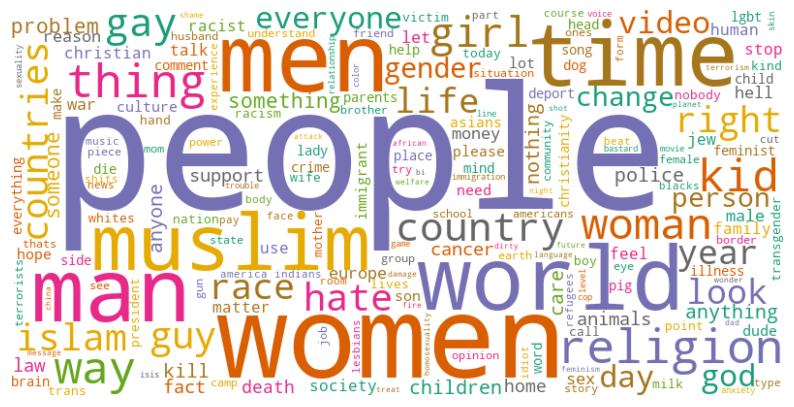

In [73]:
generate_wordcloud(datasets["ethos"]["text"], "ETHOS")

In [57]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Get NLTK English stopwords
nltk_stopwords = set(stopwords.words('english'))

# List of profane words
profane_words = ["fag","rape","like","dont","get","got","aint","lol","know","one","love","im","hoes","bitches","skank","ass","dick","fuck","niggas","nicca","faggot","retarded","bitch","rt","hoe","https","t","co","shit","fucking","cunt","Bitch","whore","slut","u","pussy","nigga","nigger"]
profane_words = []
words_to_filter = list(nltk_stopwords) + profane_words

def get_top_words(text, n=10):
    text = ' '.join(text)
    # Split the text into words
    words = text.split()
    words = [word.lower() for word in words if word.lower() not in words_to_filter]

    tagged_words = pos_tag(words)
    words = [word for word, pos in tagged_words if pos.startswith('N')]
    # Count the frequency of each word
    word_freq = Counter(words)
    # Get the top n most frequent words
    top_words = word_freq.most_common(n)
    return top_words

def filter_profanity(top_words):
    filtered = {"fuck": "f**k", "cunt": "c**t", "bitch": "b***h","bitches": "b*****s", "ass": "a*s", "nigger": "n****r", "niggers": "n*****s", "faggots": "f*****s", "nigga": "n***a", "hoes": "h**s"}
    new_top_words = []
    for set in top_words:
        if set[0] in filtered:
            new_top_words.append((filtered[set[0]], set[1]))
        else:
            new_top_words.append(set)
    return new_top_words

# Function to generate and display horizontal bar plot for top words
def plot_top_words(top_words, dataset_name):
    words, frequencies = zip(*top_words)
    plt.figure(figsize=(5, 5))
    plt.barh(words, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Most Frequent Hate Class Words in ' + dataset_name)
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Portul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Portul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('bitch', 181), ('ass', 128), ('trash', 77), ('nigger', 61), ('people', 59), ('bitches', 57), ('niggers', 55), ('nigga', 55), ('hoes', 54), ('faggots', 48)]


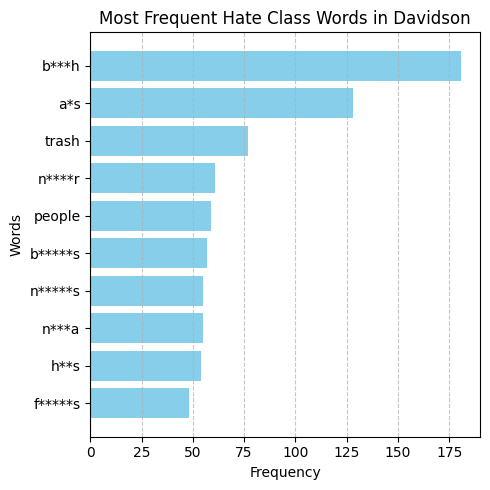

In [58]:
top_words = get_top_words(datasets["davidson"]["text"][datasets["davidson"]["class"] == 1].tolist())
print(top_words)
plot_top_words(filter_profanity(top_words), "Davidson")

[('bitch', 738), ('women', 392), ('refugees', 237), ('cunt', 233), ('immigration', 226), ('people', 219), ('migrants', 214), ('woman', 210), ('country', 196), ('immigrants', 194)]


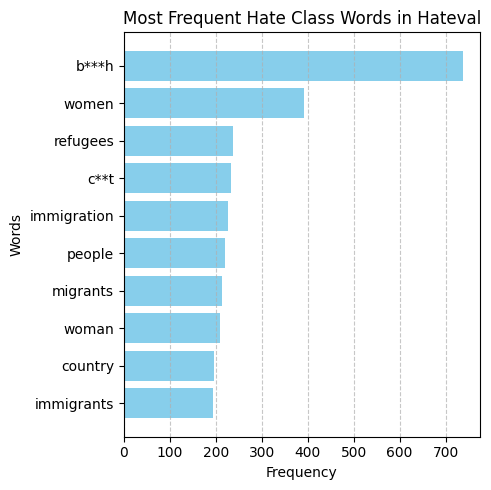

In [59]:
top_words = get_top_words(datasets["hateval"]["text"][datasets["hateval"]["class"] == 1].tolist())
print(top_words)
plot_top_words(filter_profanity(top_words), "Hateval")

[('people', 31), ('women', 21), ('muslims', 20), ('islam', 13), ('men', 12), ('countries', 11), ('religion', 10), ('ass', 10), ('nothing', 8), ('niggers', 8)]


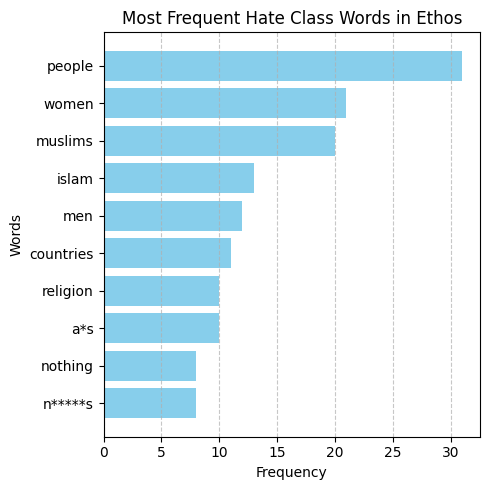

In [60]:
top_words = get_top_words(datasets["ethos"]["text"][datasets["ethos"]["class"] == 1].tolist())
print(top_words)
plot_top_words(filter_profanity(top_words), "Ethos")

[('nigger', 2729), ('jew', 1298), ('fat', 1258), ('gay', 704), ('die', 646), ('fuck', 506), ('cunt', 383), ('mexicans', 365), ('ass', 356), ('bitch', 329)]


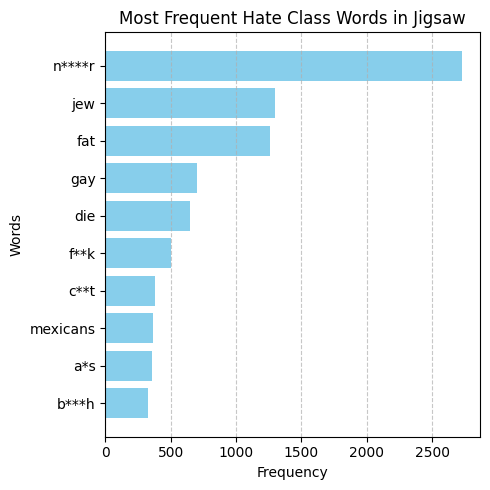

In [61]:
top_words = get_top_words(datasets["jigsaw"]["text"][datasets["jigsaw"]["class"] == 1].tolist())
print(top_words)
plot_top_words(filter_profanity(top_words), "Jigsaw")

[('cunt', 3102), ('nigger', 2593), ('people', 2379), ('women', 1210), ('retard', 1036), ('time', 948), ('jews', 906), ('men', 867), ('man', 866), ('jew', 802)]


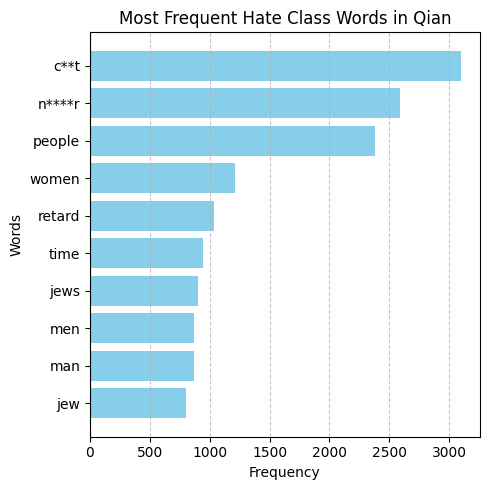

In [62]:
top_words = get_top_words(datasets["qian"]["text"][datasets["qian"]["class"] == 1].tolist())
print(top_words)
plot_top_words(filter_profanity(top_words), "Qian")